<a href="https://colab.research.google.com/github/TCC-SystemEngineeringDept/R07AIprogDemo/blob/main/20harris_benedict_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google ai studio で作成した gemini api キーを使う


---
## 注意
今から説明するのは、「Gemini API “Free tier”」と呼ばれる使い方です。

クレジットカードは登録しません。 3 万リクエスト分ぐらいの無料枠（毎月タダで遊べるチケット）がもらえます。 枠を使い切ると 「無料分を使い切りました」エラーが出て止まるだけで、勝手に請求はされません。

ガンガン使いたい場合は、クレジットカードを登録してください。

---

## Gemini APIキーを作成する

Gemini APIを使用するためには、「APIキー」という、非公開の文字列が必要です。APIキーなしでGemini APIを使用することはできません。

Gemini APIを作成するためには、Google Cloudでプロジェクトを作成します。プロジェクトにクレジットカードなど連携すれば、ガンガン使えます（当然ガンガン請求されます）。クレジットカードを連携しなければ、料金を請求されることはありません。

### *手順１*
保存した API キーにアクセスし、Gemini API を初期化する Python コードを生成します。
「Google AI Studioでキーを管理」をクリックしてください


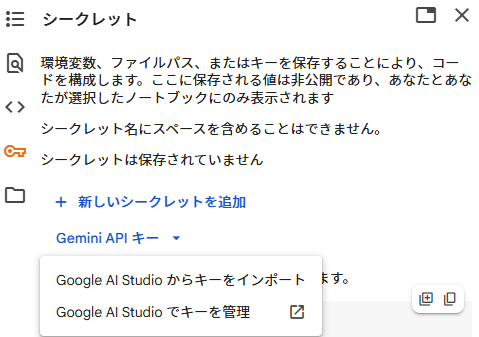

### *手順２*

「Build with the Gemini API」をクリックします。

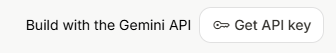

### *手順３*

右上「APIキーを生成」をクリック、ダイアログのメッセージ「API キーと Google Cloud プロジェクトを作成できませんでした。Google Cloud コンソールでプロジェクトを作成してください。」から、Google Cloud コンソールを開いてください。

### *手順４*

「□Google Cloud Platform の利用規約 および適用されるサービスと API の利用規約に同意します。」にチェックして、「同意して続行」します。

プロジェクト名は「AIProg-2025-0907」にします。
（ここは何でもいいです。終わったら削除してもかまいません）

「作成」をクリックします。

### *手順５*

Google AI Studioのページに戻って、読み直しをします。

もう一度「Google AI Studioでキーを管理」をクリックしてください。「Search Google Cloud projects」をクリックすると、先ほど作った「AIProg-2025-0907」が出てきます。

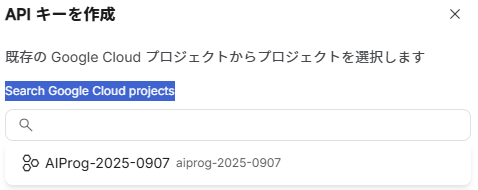


「AIProg-2025-0907」をクリックすると、その下に「既存のプロジェクトでAPIキーを作成」というボタンが出てくるので、クリックします。

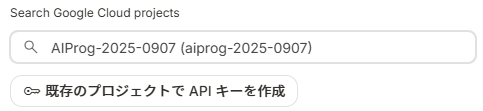

キーができたら、Google Colabに戻り、左側「Gemini  APIキー」から「Google AI Studioからキーをインポート」をクリックします。

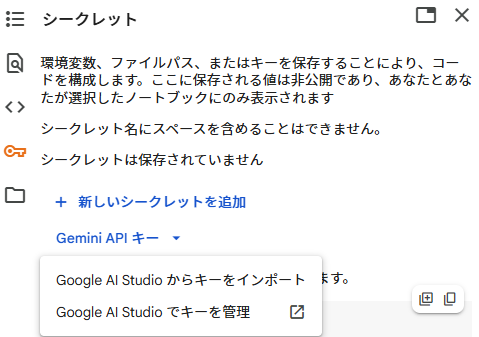

キーが1つ出てくるので、それを選んでください。インポートします。

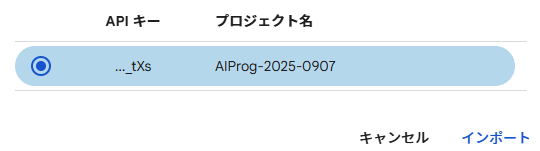

### *手順６*

インポートに成功していると、下のプログラムが動きます。先頭の▶をクリックしてください。


In [ ]:
import google.generativeai as genai
import google.colab.userdata

# Access the saved Gemini API key from Colab's Secrets Manager
api_key = google.colab.userdata.get('GOOGLE_API_KEY')

# Initialize the Gemini API
genai.configure(api_key=api_key)

print("Gemini API initialized successfully.")

　↑「Gemini API initialized successfully.」となっていれば成功です。

「SecretNotFoundError: Secret GOOGLE_API_KEY does not exist.」になっていれば、キーが設定されていないか確認して、詳しい人を詳しい人を呼んでください。


## Gemini api と対話するサンプルコードを実行します

### *手順１*

下のプログラムの▶をクリックしてください。


In [ ]:
# Load the Gemini model to be used for the conversation
model = genai.GenerativeModel('gemini-2.5-flash')

# Start a new chat session
chat = model.start_chat(history=[])

# Send a message to the model
response = chat.send_message("Hello, how are you?")

# Get and display the model's response
print(response.text)

プログラムの説明をすると、

* model = genai.GenerativeModel('gemini-2.5-flash')

　　　↑「gemini-2.5-flashを使ってね」というお願い

* chat = model.start_chat(history=[])

　　　↑「新しいチャットを始めるよ！」という宣言。ただし、今までの履歴は無し

* response = chat.send_message("Hello, how are you?")

　　　↑「Hello, how are you?」という質問を送信宣言

* print(response.text)

　　　↑結果を画面に表示

("Hello, how are you?")のメッセージを変えると、Geminiに送信するメッセージが変わります。

例：

response = chat.send_message("「久しぶりに会ったおじいちゃんが、トランペットを練習していました。やっと音が出たおじいちゃんにほくは一言いいました。おじいちゃん、ふけたね!」というジョークを解説してください。")


## 計算が大変な処理を生成AIにやってもらう

世の中で使われている指数などは、実は多くのパラメーターを複雑な計算式で計算して、結果が出ているものが多いです。いままでは、その計算式をアルゴリズムとしてプログラム言語で記述する必要がありましたが、生成AIを呼び出すことで、難しい計算プログラムを作らなくても、うまいこと計算してくれます。

ここでは、「ハリス・ベネディクト方程式」という、基礎代謝を求める計算式を使い、
* 1日の推定総消費カロリー
* 一日三食としたときの一食当たりの理想的なPFCバランス

を教えてもらいます。

In [ ]:
# 必要なライブラリをインポート
import google.generativeai as genai
import google.colab.userdata
import ipywidgets as widgets
from IPython.display import display, clear_output
import time # 時間を制御するライブラリをインポート

# --- Google Colab SecretsからAPIキーを取得 ---
try:
    api_key = google.colab.userdata.get('GOOGLE_API_KEY')
    genai.configure(api_key=api_key)
    print("APIキーが正常に設定されました。")
except Exception as e:
    print(f"APIキーの設定に失敗しました: {e}")
    print("ColabのSecretsに'GOOGLE_API_KEY'が正しく設定されているか確認してください。")

# Geminiモデルを初期化
model = genai.GenerativeModel('gemini-2.5-pro')

# --- ウィジェットの作成 ---

# 年齢のプルダウンメニュー
age_options = ['高校生', '大学生', '20代', '30代', '40代', '50代', '60歳以上']
age_widget = widgets.Dropdown(
    options=age_options,
    description='年齢:',
    value='高校生'
)

# 身長のプルダウンメニュー (150cmから190cmまで5cm刻み)
height_options = [f"{h:.1f}" for h in range(150, 191, 5)]
height_widget = widgets.Dropdown(
    options=height_options,
    description='身長(cm):',
    value='170.0'
)

# 体重のプルダウンメニュー (35kgから80kgまで5kg刻み)
weight_options = [f"{w:.1f}" for w in range(35, 81, 5)]
weight_widget = widgets.Dropdown(
    options=weight_options,
    description='体重(kg):',
    value='65.0'
)

# 活動レベルのプルダウンメニュー
activity_level_options = ['ほとんど運動しない', '軽い運動', '中程度の運動', '激しい運動', '非常に激しい運動']
activity_level_widget = widgets.Dropdown(
    options=activity_level_options,
    description='活動レベル:',
    value='中程度の運動'
)

# 性別のプルダウンメニュー
gender_options = ['男性', '女性']
gender_widget = widgets.Dropdown(
    options=gender_options,
    description='性別:',
    value='男性'
)

# 計算ボタン
calculate_button = widgets.Button(description="計算する")

# 結果表示用の出力ウィジェット
output_widget = widgets.Output()

# --- ボタンがクリックされた時の処理 ---
def on_button_clicked(b):
    with output_widget:
        # 以前の出力をクリア
        clear_output(wait=True)

        # ローディング中の表示
        loading_text = "計算を実行中です... "
        print(loading_text, end='', flush=True)

        # ウィジェットから値を取得
        selected_age = age_widget.value
        selected_height = height_widget.value
        selected_weight = weight_widget.value
        selected_activity_level = activity_level_widget.value
        selected_gender = gender_widget.value

        try:
            # Geminiに渡すプロンプトを作成
            prompt = f"""
            あなたは消費カロリーを計算するAIアシスタントです。
            以下の情報に基づいて、一日の総消費カロリーを計算してください。
            ハリス-ベネディクト方程式（日本人の体格に合わせて調整された改良版の式）と活動レベルを考慮してください。
            また、理想的なPFCバランスを考え、三大栄養素を一日3食として1食あたり何グラム採ることになるかも教えてください。
            炭水化物は、一般的なおにぎりだと何個ぶんか教えてください。

            - 性別: {selected_gender}
            - 年齢層: {selected_age}
            - 身長: {selected_height} cm
            - 体重: {selected_weight} kg
            - 活動レベル: {selected_activity_level}

            回答は、以下のフォーマットに従って簡潔に記述してください。
            一日の推定総消費カロリー: [総カロリー] kcal
            1食の推奨PFCバランス:
            ・タンパク質: [タンパク質グラム] g
            ・脂質: [脂質グラム] g
            ・炭水化物: [炭水化物グラム] g　→おにぎりだと[おにぎりの個数]個
            """

            # Gemini APIを呼び出し
            # ローディング表示を維持するために、一時的に出力を停止しない
            response = model.generate_content(prompt)
            result = response.text.strip()

            # 最終的な結果を表示するために、ローディング表示をクリア
            clear_output(wait=True)

            # 結果の表示
            print("\n------------------------------")
            print("【計算結果】")
            print(result)
            print("------------------------------")

        except Exception as e:
            # エラー発生時もローディング表示をクリア
            clear_output(wait=True)
            print(f"\nエラーが発生しました: {e}")
            print("APIキーが正しく設定されているか、またはプロンプトの内容を確認してください。")

# ボタンにクリックイベントを紐付け
calculate_button.on_click(on_button_clicked)

# --- ウィジェットを縦に並べて表示 ---
display(widgets.VBox([
    age_widget,
    gender_widget,
    height_widget,
    weight_widget,
    activity_level_widget,
    calculate_button,
    output_widget
]))